In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取EXCEL表格
file_path = 'E:\ZKP\persons comparision\Statistical\Questionaire.xlsx'  # 替换为你的EXCEL文件路径
addiction = pd.read_excel(file_path, sheet_name='集合_单冰毒', usecols="E:F",header=1,nrows=20) 
addiction.columns = ['MBT', 'MAT']
BDI = pd.read_excel(file_path, sheet_name='集合_单冰毒', usecols="I:J",header=1,nrows=20)
BDI.columns = ['MBT', 'MAT']
BAI = pd.read_excel(file_path, sheet_name='集合_单冰毒', usecols="M:N",header=1,nrows=20)
BAI.columns = ['MBT', 'MAT']
SCL90 = pd.read_excel(file_path, sheet_name='集合_单冰毒', usecols="O:P",header=1,nrows=20)
SCL90.columns = ['MBT', 'MAT']

In [2]:
# import itertools
# 
# 
# def cus_melt(df,q_name):
#     df = df.melt(var_name='Group', value_name='Score')
#     df['Questionaire'] = q_name
#     return df
# BDI= cus_melt(BDI,'BDI')
# BAI= cus_melt(BAI,'BAI')
# SCL90= cus_melt(SCL90,'SCL90')
# addiction= cus_melt(addiction,'DQQ')
# table=pd.concat([BDI,BAI,SCL90,addiction],axis=0)
# plt.figure(figsize=(12, 6), dpi=300)
# ax =sns.barplot(data=table,capsize=.1,errorbar=('ci', 95),hue='Group',x='Questionaire',y='Score')
# num_locations = 2
# # hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
# hatches = itertools.cycle(['/', '///'])
# for i, bar in enumerate(ax.patches):
#     if i in [0,1,2,3]:
#         bar.set_hatch('x')
#     else:
#         bar.set_hatch('+')
# plt.title('Questionnaire Assessment')
# ax.legend(fancybox=True)
# plt.show()

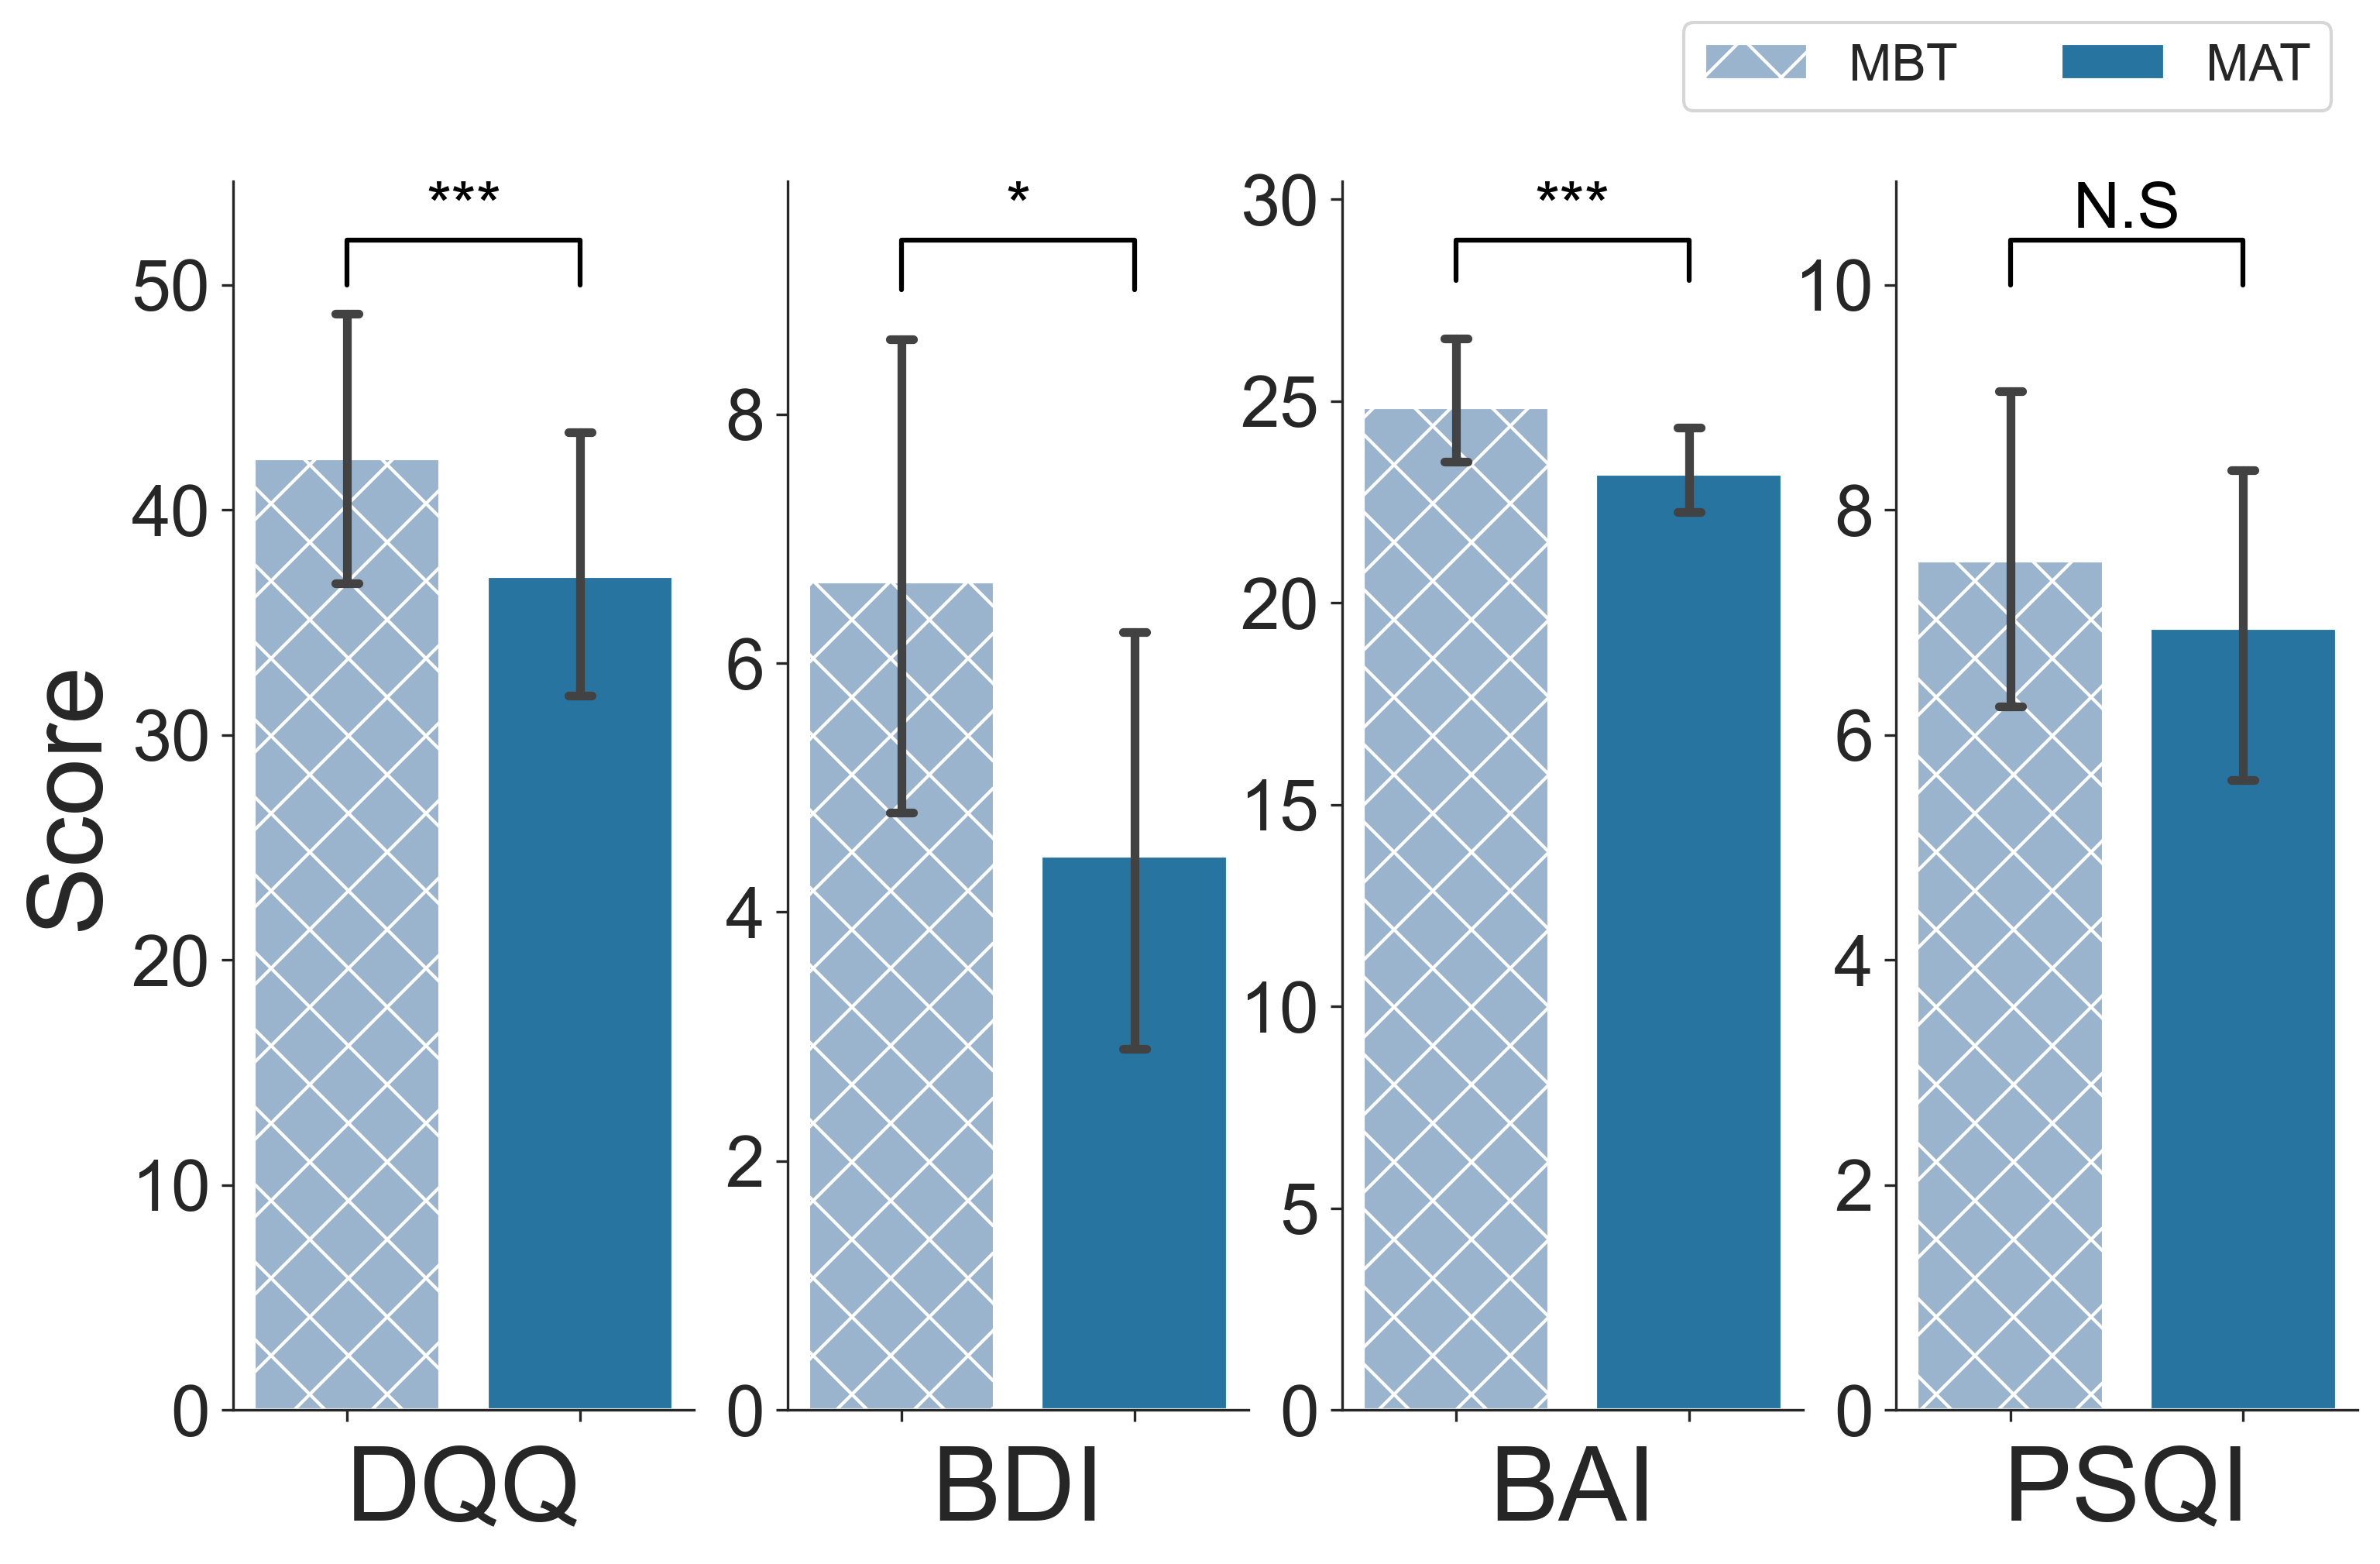

In [7]:
sns.set_style('ticks')
custom_palette = sns.color_palette("PuBu")
custom_palette = [custom_palette[-4], custom_palette[-2]]

fig,axes=plt.subplots(figsize=(10, 6), dpi=300,ncols=4)
sns.barplot(data=addiction,ax=axes[0],capsize=.1,errorbar=('ci', 95),palette=custom_palette)
axes[0].set_xlabel('DQQ')
axes[0].set_ylabel('Score')
sns.barplot(data=BDI,ax=axes[1],capsize=.1,errorbar=('ci', 95),palette=custom_palette)
axes[1].set_xlabel('BDI')
sns.barplot(data=BAI,ax=axes[2],capsize=.1,errorbar=('ci', 95),palette=custom_palette)
axes[2].set_xlabel('BAI')
sns.barplot(data=SCL90,ax=axes[3],capsize=.1,errorbar=('ci', 95),label=['MBT','MAT'],palette=custom_palette)
axes[3].set_xlabel('PSQI')

for ax in axes:
    ax.set_xticklabels([])

def set_ax(ax_):
    ax_.patches[0].set_hatch('x')
    # ax_.patches[1].set_hatch('+')
    ax_.yaxis.label.set_size(20)
    ax_.xaxis.label.set_size(18)
    return ax_

set_ax(axes[0])
set_ax(axes[1])
set_ax(axes[2])
set_ax(axes[3])

def plot_statistic(ax_,star,y1_,h_):
    x1, x2 = 0, 1
    ax_.plot([x1, x1, x2, x2], [y1_, y1_+h_, y1_+h_, y1_], lw=1.5, c="k")
    ax_.text((x1+x2)*.5, y1_+h_, star, ha='center', va='bottom', color="k",fontsize=20)
    return ax_
plot_statistic(axes[0],'***', y1_=50,h_=2)
plot_statistic(axes[1],'*',y1_=9,h_=0.4)
plot_statistic(axes[2],'***',y1_=28,h_=1)
plot_statistic(axes[3],'N.S',y1_=10,h_=0.4)

fig.tight_layout()
axes[3].legend(bbox_to_anchor=(1, 1.15),loc='upper right',ncol=2,frameon=True, fancybox=True, shadow=False,fontsize=16)

for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(32)
for ax in axes:
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(22)


sns.despine()
plt.show()

In [4]:
# sns.set_style('white')
# sns.set_palette(sns.color_palette('GnBu'))
# fig,axes=plt.subplots(figsize=(8, 3), dpi=300,ncols=4)
# sns.barplot(data=addiction,ax=axes[0],capsize=.1,errorbar=('ci', 95))
# axes[0].set_ylabel('Score')
# axes[0].set_title('DQQ')
# sns.barplot(data=BDI,ax=axes[1],capsize=.1,errorbar=('ci', 95))
# axes[1].set_ylabel('Score')
# axes[1].set_title('BDI')
# sns.barplot(data=BAI,ax=axes[2],capsize=.1,errorbar=('ci', 95))
# axes[2].set_ylabel('Score')
# axes[2].set_title('BAI')
# sns.barplot(data=SCL90,ax=axes[3],capsize=.1,errorbar=('ci', 95))
# axes[3].set_ylabel('Score')
# axes[3].set_title('Sleep')
# plt.suptitle('Questionnaire Assessment')
# fig.tight_layout()
# sns.despine()
# plt.show()


In [5]:
from scipy.stats import wilcoxon

# 假设有两个相关样本的数据，分别存储在名为 "data1" 和 "data2" 的数组中

# 执行Wilcoxon符号秩检验
statistic, p_value = wilcoxon(addiction['MBT'], addiction['MAT'])
# 输出Wilcoxon符号秩检验结果
print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)
statistic, p_value = wilcoxon(BAI['MBT'], BAI['MAT'])
# 输出Wilcoxon符号秩检验结果
print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)
statistic, p_value = wilcoxon(BDI['MBT'], BDI['MAT'])
# 输出Wilcoxon符号秩检验结果
print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)
statistic, p_value = wilcoxon(SCL90['MBT'], SCL90['MAT'])
# 输出Wilcoxon符号秩检验结果
print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)

Wilcoxon statistic: 25.5
p-value: 0.005124541795284922
Wilcoxon statistic: 32.5
p-value: 0.06527373254434139
Wilcoxon statistic: 12.5
p-value: 0.0037665799502693002
Wilcoxon statistic: 70.0
p-value: 0.4980730261422138


E:\anaconda3\envs\DL\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
